CLASSIFICATION OF TRAFFIC SIGNS USING LENET ARCHITECTURE IN KERAS

STEP 0: PROBLEM STATEMENT

- Images of traffic signs have been provided. Goal is to train a Deep Network to classify them.
- The dataset contains 43 different classes of images
- The classes are as follows:

(0, b'Speed limit (20km/h)')
(1, b'Speed limit (30km/h)')
(2, b'Speed limit (50km/h)')
(3, b'Speed limit (60km/h)')
(4, b'Speed limit (70km/h)') 
(5, b'Speed limit (80km/h)') 
(6, b'End of speed limit (80km/h)')
(7, b'Speed limit (100km/h)')
(8, b'Speed limit (120km/h)')
(9, b'No passing') 
(10, b'No passing for vehicles over 3.5 metric tons')
(11, b'Right-of-way at the next intersection')
(12, b'Priority road')
(13, b'Yield')
(14, b'Stop') 
(15, b'No vehicles')
(16, b'Vehicles over 3.5 metric tons prohibited')
(17, b'No entry')
(18, b'General caution')
(19, b'Dangerous curve to the left')
(20, b'Dangerous curve to the right')
(21, b'Double curve')
(22, b'Bumpy road')
(23, b'Slippery road')
(24, b'Road narrows on the right')
(25, b'Road work')
(26, b'Traffic signals')
(27, b'Pedestrians')
(28, b'Children crossing')
(29, b'Bicycles crossing')
(30, b'Beware of ice/snow')
(31, b'Wild animals crossing')
(32, b'End of all speed and passing limits')
(33, b'Turn right ahead')
(34, b'Turn left ahead')
(35, b'Ahead only')
(36, b'Go straight or right')
(37, b'Go straight or left')
(38, b'Keep right')
(39, b'Keep left')
(40, b'Roundabout mandatory')
(41, b'End of no passing')
(42, b'End of no passing by vehicles over 3.5 metric tons')

STEP 1: IMPORT LIBRARIES AND DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from google.colab import drive 

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
with open('gdrive/My Drive/TrafficSignClassification/traffic-signs-data/train.p', mode ='rb') as training_data:
  train = pickle.load(training_data)
with open('gdrive/My Drive/TrafficSignClassification/traffic-signs-data/valid.p', mode ='rb') as validation_data:
  valid = pickle.load(validation_data)
with open('gdrive/My Drive/TrafficSignClassification/traffic-signs-data/test.p', mode ='rb') as testing_data:
  test = pickle.load(testing_data)

In [ ]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)
print(X_test.shape)
print(y_test.shape)

(34799, 32, 32, 3)
(34799,)
(4410, 32, 32, 3)
(4410,)
(12630, 32, 32, 3)
(12630,)


STEP 2: IMAGE EXPLORATION

25

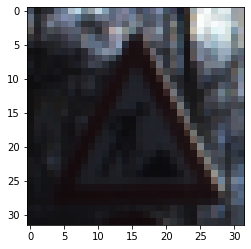

In [ ]:
plt.imshow(X_train[34798])
y_train[34798]

STEP 3: DATA PREPARATION

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [ ]:
print(X_train_gray.shape)
print(X_test_gray.shape)
print(X_validation_gray.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [ ]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

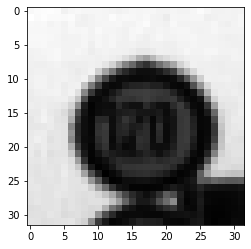

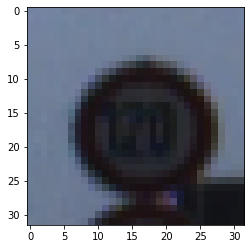

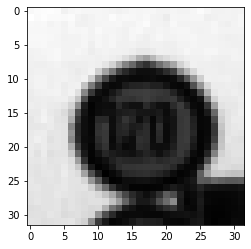

In [ ]:
i = 1
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

STEP 4: MODEL TRAINING

Step 1: THE FIRST CONVULTIONAL LAYER #1
*   Input = 32x32x1
*   Output = 28x28x6
*   Output = (Input-Filter+1)/Stride = (32-5+1)/1 = 28
*   Used a 5x5 filter with input depth of 3 and output depth of 6
*   Apply RELU activation function to the output
*   Pooling for input, Input = 28x28x6 and Output = 14x14x6

(Stride is the amount by which the kernel is shifted when it is passed over the image)

Step 2: THE SECOND CONVOLTIONAL LAYER #2
*   Input = 14x14x6
*   Output = 10x10x16
*   Output = (Input-Filter+1)/Stride = (14-5+1)/1 = 10
*   Apply RELU activation function to the output
*   Pooling for input, Input = 10x10x16 and Output = 5x5x16

Step 3: FLATTENING THE NETWORK
*   Input = Flatten the network with Input = 5x5x16 and Output = 400

Step 4: FULLY CONNECTED LAYER
*   Layer 3: Fully connected layer with Input = 400 and Output = 120
*   Apply RELU activation function to the output

Step 5: FULLY CONNECTED LAYER
*   Layer 4: Fully connected layer with Input = 120 and Output = 84
*   Apply RELU activation function to the output

Step 5: FULLY CONNECTED LAYER
*   Layer 5: Fully connected layer with Input = 84 and Output = 43


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 6, kernel_size=(5,5), activation = 'relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters = 16, kernel_size=(5,5), activation = 'relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation = 'relu'))

cnn_model.add(Dense(units = 84, activation = 'relu'))

cnn_model.add(Dense(units = 43, activation = 'softmax'))

In [ ]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [ ]:
history = cnn_model.fit(X_train_gray_norm,
              y_train,
              batch_size = 500,
              epochs = 5,
              verbose = 1,
              validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/5
70/70 [==============================] - 18s 249ms/step - loss: 0.4362 - accuracy: 0.8817 - val_loss: 0.6311 - val_accuracy: 0.8118
Epoch 2/5
70/70 [==============================] - 15s 213ms/step - loss: 0.3652 - accuracy: 0.9039 - val_loss: 0.6101 - val_accuracy: 0.8179
Epoch 3/5
70/70 [==============================] - 15s 212ms/step - loss: 0.3196 - accuracy: 0.9174 - val_loss: 0.5705 - val_accuracy: 0.8388
Epoch 4/5
70/70 [==============================] - 15s 213ms/step - loss: 0.2863 - accuracy: 0.9265 - val_loss: 0.5612 - val_accuracy: 0.8395
Epoch 5/5
70/70 [==============================] - 16s 223ms/step - loss: 0.2514 - accuracy: 0.9364 - val_loss: 0.5496 - val_accuracy: 0.8417


STEP 5: MODEL EVALUATION